# Demonstration of the evomap Package

Replication notebook for the paper

Matthe, Maximilian (2023), "evomap: A Python Package for Dynamic Mapping". 

Python environment: evomap-package

ToDo List
- Shepard Diagram --> CHeck if order in isotonic regression is really correct? (for shepard diagram AND mds code)

# Setup

First, create path variabels for each subfolder and load the essential packages.

In [1]:
import pandas as pd
import numpy as np
import os

PATH_HOME = os.path.dirname(os.getcwd()) # parent folder
PATH_OUT = os.path.join(PATH_HOME, 'gen') # output folder

title_fontdict_large = {'size': 14, 'family': 'Arial'}
title_fontdict = {'size': 12, 'family': 'Arial'}
label_fontdict = {'size': 10, 'family': 'Arial'}

np.random.seed(123)

# Section 1: Demonstration of Static MDS

For the first example, load the small TNIC snapshot from the dataset submodule

In [2]:
from evomap.datasets import load_tnic_snapshot_small

data = load_tnic_snapshot_small()

The data contains a single similarity matrix and labels for each object.

In [3]:
S = data['matrix']
labels = data['labels']
labels

array(['APPLE INC', 'AT&T INC', 'COMCAST CORP', 'EBAY INC', 'HP INC',
       'INTUIT INC', 'MICROSOFT CORP', 'ORACLE CORP', 'US CELLULAR CORP',
       'WESTERN DIGITAL CORP'], dtype='<U20')

In [4]:
np.round(S, 2)

array([[0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.06, 0.04, 0.  , 0.07],
       [0.  , 0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  ],
       [0.  , 0.03, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.03, 0.  , 0.  , 0.  ],
       [0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.09, 0.  , 0.  , 0.05, 0.  , 0.  , 0.  ],
       [0.06, 0.  , 0.  , 0.03, 0.01, 0.05, 0.  , 0.1 , 0.  , 0.03],
       [0.04, 0.  , 0.  , 0.  , 0.01, 0.  , 0.1 , 0.  , 0.  , 0.03],
       [0.  , 0.08, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.07, 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.03, 0.  , 0.  ]])

To map this similarity matrix via MDS, we first transform it into dissimilarities using the sim2diss function from the preprocessing submodule

In [5]:
from evomap.preprocessing import sim2diss
D = sim2diss(S, transformation = 'mirror')
np.round(D, 2)

array([[0.  , 1.  , 1.  , 1.  , 0.93, 1.  , 0.94, 0.96, 1.  , 0.93],
       [1.  , 0.  , 0.97, 1.  , 1.  , 1.  , 1.  , 1.  , 0.92, 1.  ],
       [1.  , 0.97, 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.99, 1.  ],
       [1.  , 1.  , 1.  , 0.  , 1.  , 0.91, 0.97, 1.  , 1.  , 1.  ],
       [0.93, 1.  , 1.  , 1.  , 0.  , 1.  , 0.99, 0.99, 1.  , 1.  ],
       [1.  , 1.  , 1.  , 0.91, 1.  , 0.  , 0.95, 1.  , 1.  , 1.  ],
       [0.94, 1.  , 1.  , 0.97, 0.99, 0.95, 0.  , 0.9 , 1.  , 0.97],
       [0.96, 1.  , 1.  , 1.  , 0.99, 1.  , 0.9 , 0.  , 1.  , 0.97],
       [1.  , 0.92, 0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 0.  , 1.  ],
       [0.93, 1.  , 1.  , 1.  , 1.  , 1.  , 0.97, 0.97, 1.  , 0.  ]])

Then, we run ordinal MDS, initialized via Classical Scaling.

In [6]:
from evomap.mapping import MDS
X = MDS(
    mds_type = 'ordinal', 
    init = 'cmds').fit_transform(D)

Plot the results using the draw_map function from the printer submodule

In [7]:
from matplotlib import pyplot as plt
from evomap.printer import draw_map

fig, ax = plt.subplots(1,2, figsize = (12,6))
draw_map(
    X, 
    label = labels, 
    show_axes = True, 
    axes_at_origin = False, 
    show_grid = False, 
    title = 'A: Non-Metric MDS Map \n', ax = ax[0])

Next, add the Shepard diagram

In [8]:
type(ax[0])

matplotlib.axes._axes.Axes

In [9]:
from evomap.printer import draw_shepard_diagram
    
draw_shepard_diagram(X,D, ax = ax[1])
ax[1].set_title('B: Shepard Diagramm \n', fontdict= title_fontdict)
ax[1].legend(['Observed dissimilarities', 'Transformed dissimilariites'], loc = 4, prop = label_fontdict)

and display the resulting Figure

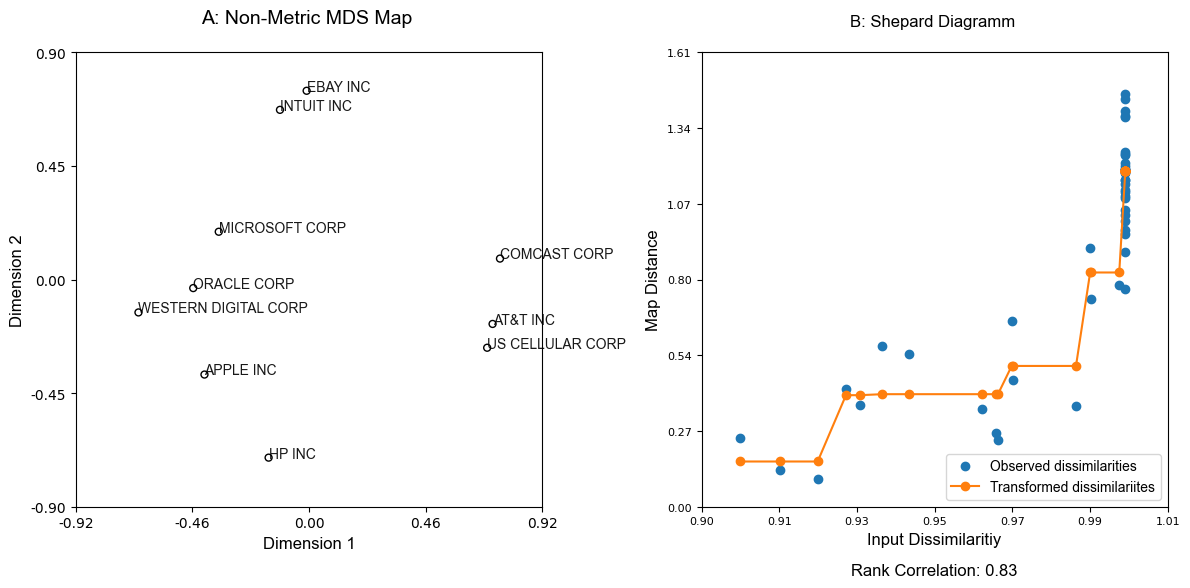

In [10]:
fig.tight_layout()
fig.savefig(os.path.join(PATH_OUT, 'sect1_mds_statc.PNG'), dpi = 300)
fig

# Section 1: Dynamic MDS Example

For the dynamic example, we load another sample from the TNIC dataset that includes multiple periods.

In [11]:
from evomap.datasets import load_tnic_sample_small
data = load_tnic_sample_small()
#labels = data[data['sic1'].map(lambda x: x.startswith("36"))].groupby('name1').agg({'year':'nunique'}).query('year == 20').index.values
#labels = [label for label in labels if not label == "CALAMP CORP"] # Exclude calamp corp, as it has no connections to the others in one period
#labels
data.head()

,year,gvkey1,gvkey2,score,name1,name2,sic1,sic2,size1,size2
0,1998,1078,1602,0.0274,ABBOTT LABORATORIES,AMGEN INC,3845,2836,74.211937,36.866437
1,1999,1078,1602,0.0352,ABBOTT LABORATORIES,AMGEN INC,3845,2836,87.854384,48.541222
2,2000,1078,1602,0.0348,ABBOTT LABORATORIES,AMGEN INC,3845,2836,70.098508,93.428689
3,2001,1078,1602,0.0218,ABBOTT LABORATORIES,AMGEN INC,3845,2836,110.299430,34.410965
4,2002,1078,1602,0.0366,ABBOTT LABORATORIES,AMGEN INC,3845,2836,40.140853,42.840198


The sample is organized as an edgelist where each observation corresponds to a single firm x firm pair.

For this simple example, we select only a few firms, drop all other firms, and remove the gvkey identifier. 

We focus on the period between 2000 and 2011 as all selected firms are present in each of the years within this period. 

In [12]:
labels = np.array(['APPLE INC', 'AT&T INC', 'COMCAST CORP', 'EBAY INC', 'HP INC',
       'INTUIT INC', 'MICROSOFT CORP', 'ORACLE CORP', 'US CELLULAR CORP',
       'WESTERN DIGITAL CORP'])

data = data.query('name1 in @labels').query('name2 in @labels')
data = data[['year', 'name1', 'name2', 'score', 'sic1', 'sic2', 'size1', 'size2']]
data = data.sort_values(['year', 'name1'])
data = data.query('year >= 2000').query('year <= 2011')
data.index = range(len(data))
periods = data.year.unique()
n_periods = len(periods)
data.head()

,year,name1,name2,score,sic1,sic2,size1,size2
0,2000,APPLE INC,HP INC,0.0314,3663,3570,60.079253,190.637477
1,2000,APPLE INC,WESTERN DIGITAL CORP,0.0813,3663,3572,10.652736,15.988003
2,2000,APPLE INC,MICROSOFT CORP,0.0930,3663,7372,44.120740,619.890226
3,2000,APPLE INC,ORACLE CORP,0.0096,3663,7370,33.605576,79.457232
4,2000,AT&T INC,US CELLULAR CORP,0.0247,4812,4812,254.800402,23.995960


In [13]:
data.tail()

,year,name1,name2,score,sic1,sic2,size1,size2
269,2011,ORACLE CORP,MICROSOFT CORP,0.1265,7370,7372,204.835673,303.674864
270,2011,ORACLE CORP,INTUIT INC,0.0067,7370,7372,190.249621,4.237707
271,2011,US CELLULAR CORP,COMCAST CORP,0.0498,4812,4841,17.736915,112.354973
272,2011,US CELLULAR CORP,AT&T INC,0.0647,4812,4812,4.759610,179.133238
273,2011,WESTERN DIGITAL CORP,APPLE INC,0.0440,3572,3663,33.401311,431.568144


Save results as Table 2 in the paper

In [14]:
table_1 = pd.concat([data.head(), data.tail()], axis = 0)
table_1.to_excel(os.path.join(PATH_OUT, "table2-data-overview.xlsx"))

Next, transform the edgelist into a sequence of similarity matrices

In [15]:
from evomap.preprocessing import edgelist2matrices
S_t, labels_t = edgelist2matrices(
    data, 
    score_var = 'score', 
    id_var_i = 'name1', 
    id_var_j ='name2', 
    time_var = 'year')

The result is a sequence of matrices and a sequence of labels. As the sample is balanced, all labels remain the same over time in this example. Therefore, we simply use the first list of labels in what follows. 

In [16]:
labels = labels_t[0]
n_samples = len(labels)

Next, transform each similarity matrix into a dissimilarity matrix

In [17]:
D_t = []
for S in S_t:
    D_t.append(sim2diss(S, transformation = 'mirror'))

Preview a single dissimilarity matrix

In [18]:
D_t[0].round(2)

array([[0.  , 1.  , 1.  , 0.97, 1.  , 0.91, 0.99, 1.  , 0.92],
       [1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 1.  , 0.98, 1.  ],
       [1.  , 1.  , 0.  , 1.  , 1.  , 1.  , 1.  , 0.99, 1.  ],
       [0.97, 1.  , 1.  , 0.  , 1.  , 0.94, 0.9 , 1.  , 0.96],
       [1.  , 1.  , 1.  , 1.  , 0.  , 0.96, 1.  , 1.  , 1.  ],
       [0.91, 1.  , 1.  , 0.94, 0.96, 0.  , 0.92, 1.  , 0.94],
       [0.99, 1.  , 1.  , 0.9 , 1.  , 0.92, 0.  , 1.  , 0.98],
       [1.  , 0.98, 0.99, 1.  , 1.  , 1.  , 1.  , 0.  , 1.  ],
       [0.92, 1.  , 1.  , 0.96, 1.  , 0.94, 0.98, 1.  , 0.  ]])

## Comparison I: Run MDS independently

In [19]:
X_t_indep = []
cost_indep = []
for D in D_t:
    static_mds = MDS(
    mds_type= 'ordinal',
    init = 'cmds')
    X = static_mds.fit_transform(D)
    X_t_indep.append(X)
    cost_indep.append(static_mds.cost_)

In [20]:
from evomap.mapping import EvoMDS
evomds_indep = EvoMDS(alpha = 0, mds_type='ordinal')
X_t_indep = evomds_indep.fit_transform(D_t)

In [21]:
from evomap.transform import align_maps
X_t_indep_aligned = align_maps(X_t_indep, X_t_indep[0])

## Comparison III: EvoMDS

In [22]:
from evomap.mapping import EvoMDS

evomds = EvoMDS(alpha = 0.2, mds_type = 'ordinal', verbose=2)
X_t = evomds.fit_transform(D_t) 

[EvoMDS] Running Gradient Descent with Backtracking via Halving
[EvoMDS] Iteration 50 -- Cost: 3.95 -- Gradient Norm: 0.7350
[EvoMDS] Iteration 100 -- Cost: 3.66 -- Gradient Norm: 0.0013
[EvoMDS] Iteration 120: gradient norm vanished. Final cost: 3.67


 #TODO: Check why label sizes look so different when not setting them manually

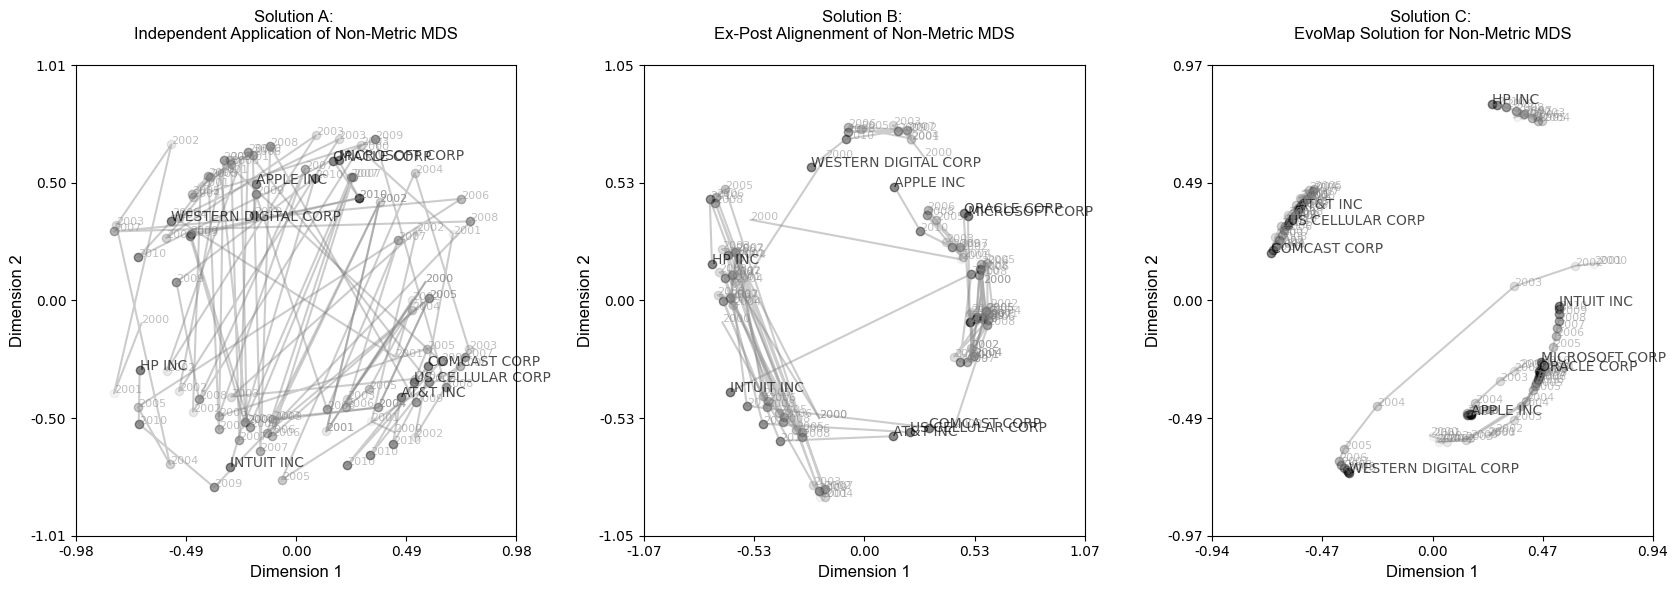

In [23]:
from evomap.printer import draw_trajectories
fig, ax = plt.subplots(1,3,figsize = (17,6))
draw_trajectories(X_t_indep, show_axes= True, labels = data.name1.unique(), period_labels= periods, ax = ax[0])
draw_trajectories(X_t_indep_aligned, labels = data.name1.unique(), period_labels= periods, show_axes=True, ax = ax[1])
draw_trajectories(X_t, labels = data.name1.unique(), period_labels= periods, show_axes = True, ax = ax[2])
ax[0].set_xlabel("Dimension 1", fontdict = title_fontdict)
ax[0].set_title('Solution A: \nIndependent Application of Non-Metric MDS\n', fontdict = title_fontdict)
ax[1].set_title('Solution B: \nEx-Post Alignenment of Non-Metric MDS\n', fontdict = title_fontdict)
ax[2].set_title('Solution C: \nEvoMap Solution for Non-Metric MDS\n', fontdict = title_fontdict)

ax[1].set_xlabel("Dimension 1", fontdict = title_fontdict)
ax[2].set_xlabel("Dimension 1", fontdict = title_fontdict)
ax[0].set_ylabel("Dimension 2", fontdict = title_fontdict)
ax[1].set_ylabel("Dimension 2", fontdict = title_fontdict)
ax[2].set_ylabel("Dimension 2", fontdict = title_fontdict)
fig.tight_layout()
fig.savefig(os.path.join(PATH_OUT, 'sect1_mds_dynamic.PNG'), dpi = 300)
fig

In [24]:
print(X_t[0].round(2))

[[ 0.37 -0.27]
 [-0.55  0.43]
 [-0.66  0.22]
 [ 0.35  0.76]
 [ 0.23 -0.56]
 [-0.01 -0.56]
 [ 0.02 -0.58]
 [-0.61  0.35]
 [ 0.71  0.15]]


First snapshot

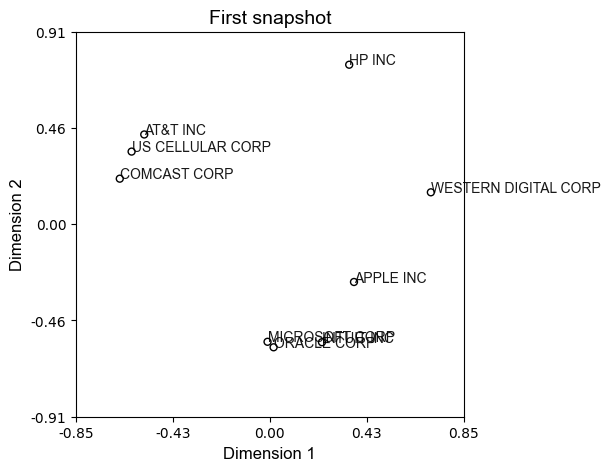

In [25]:
draw_map(X_t[0], show_axes=True, label = labels, title = 'First snapshot')

Last snapshot

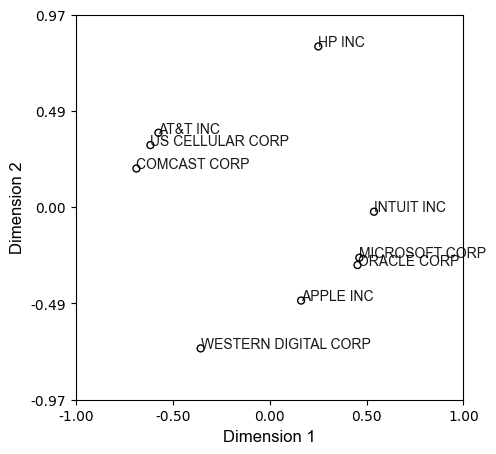

In [26]:
draw_map(X_t[-1], label = labels, show_axes = True)

Combined Figure

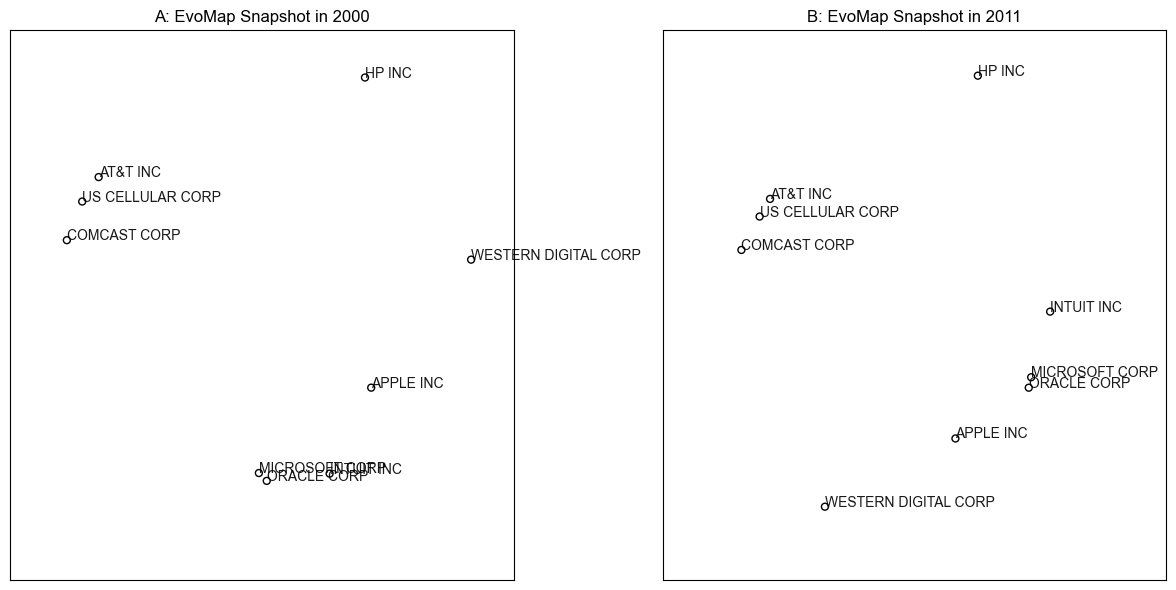

In [27]:
from evomap.printer import draw_map
fig, ax = plt.subplots(1,2,figsize = (12,6))

draw_map(X_t[0], label = labels, ax = ax[0])
draw_map(X_t[-1], label = labels, ax = ax[1])
ax[0].set_title('A: EvoMap Snapshot in {0}'.format(periods[0]), fontdict = title_fontdict)
ax[1].set_title('B: EvoMap Snapshot in {0}'.format(periods[-1]), fontdict = title_fontdict)
fig.tight_layout()
fig.savefig(os.path.join(PATH_OUT, 'sect4_evomds_snapshots.PNG'), dpi = 300)
fig

### Fixing the starting configuration

One way to fix the starting configuration is to manually calculate random numbers: 

In [28]:
init_t = []
for t in range(n_periods):
    init = np.random.normal(0,.1,(n_samples, 2))
    init_t.append(init)

In [29]:
evomds_init = EvoMDS(alpha = 0.2, mds_type = 'ordinal', init = init_t)
X_t_init = evomds_init.fit_transform(D_t) 

In [30]:
print("Final cost when initialized randomlly: {0:.3f}".format(evomds_init.cost_))

Final cost when initialized randomlly: 3.709


Another useful approach, especially for MDS variants, is to use the classical scaling solution as a starting point for the optimization:

In [31]:
from evomap.mapping import CMDS
cmds_t = []
for t in range(n_periods):
    cmds = CMDS().fit_transform(D_t[t])
    cmds_t.append(cmds)

In [32]:
evomds_init = EvoMDS(alpha = 0.2, mds_type = 'ordinal', init = init_t)
X_t_init = evomds_init.fit_transform(D_t) 

In [33]:
print("Final cost when initialized randomlly: {0:.3f}".format(evomds_init.cost_))

Final cost when initialized randomlly: 3.709


In [34]:
evomds_cmds = EvoMDS(alpha = 0.2, mds_type = 'ordinal', init = cmds_t)
X_t_cmds = evomds_cmds.fit_transform(D_t) 

In [35]:
print("Final cost when initialized via CMDS: {0:.3f}".format(evomds_cmds.cost_))

Final cost when initialized via CMDS: 3.422


In [36]:
X_t_init = align_maps(X_t_init, X_t_cmds[0])

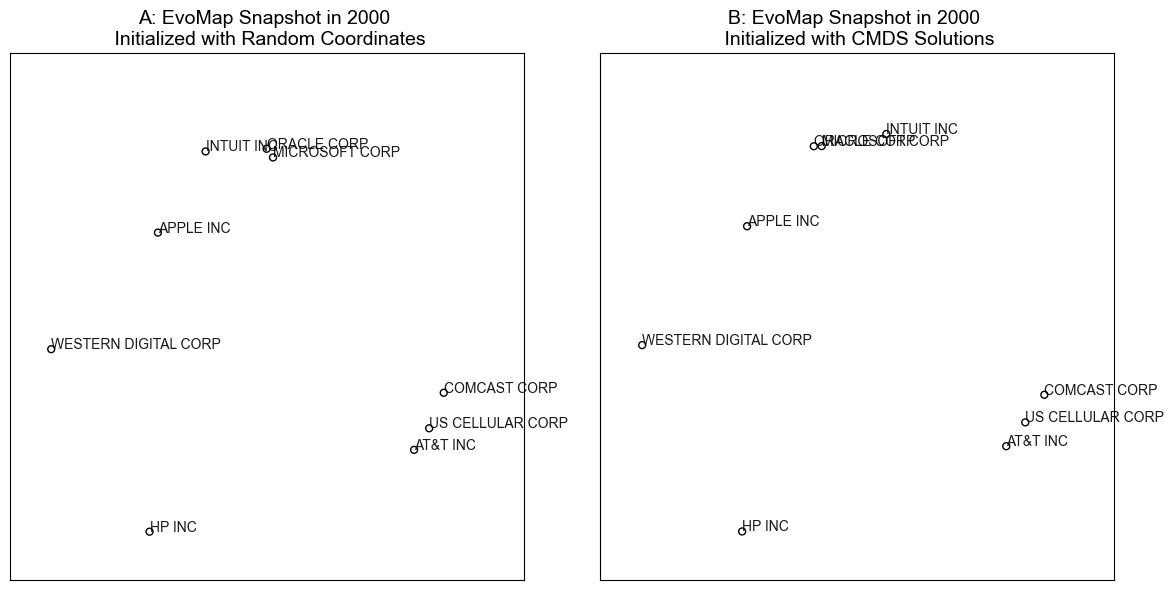

In [37]:
fig, ax = plt.subplots(1,2, figsize = (12,6))
draw_map(X_t_init[0], label = labels, ax = ax[0], title = 'A: EvoMap Snapshot in 2000 \n Initialized with Random Coordinates')
draw_map(X_t_cmds[0], label = labels, ax = ax[1], title = 'B: EvoMap Snapshot in 2000 \n Initialized with CMDS Solutions')
fig.tight_layout()
fig.savefig(os.path.join(PATH_OUT, 'sect4_different_initialization.PNG'), dpi = 300)
fig

### Verbosity

In [38]:
EvoMDS(
    alpha = 0.2, 
    mds_type = 'ordinal', 
    init = cmds_t,
    verbose = 0).fit(D_t)

In [39]:
EvoMDS(
    alpha = 0.2, 
    mds_type = 'ordinal', 
    init = cmds_t,
    verbose = 1).fit(D_t)

[EvoMDS] Running Gradient Descent with Backtracking via Halving
[EvoMDS] Iteration 648: gradient norm vanished. Final cost: 3.42


In [40]:
EvoMDS(
    alpha = 0.2, 
    mds_type = 'ordinal', 
    init = cmds_t,
    verbose = 2).fit(D_t)

[EvoMDS] Running Gradient Descent with Backtracking via Halving
[EvoMDS] Iteration 50 -- Cost: 3.46 -- Gradient Norm: 0.0323
[EvoMDS] Iteration 100 -- Cost: 3.46 -- Gradient Norm: 0.0028
[EvoMDS] Iteration 150 -- Cost: 3.47 -- Gradient Norm: 0.0025
[EvoMDS] Iteration 200 -- Cost: 3.48 -- Gradient Norm: 0.0022
[EvoMDS] Iteration 250 -- Cost: 3.49 -- Gradient Norm: 0.0020
[EvoMDS] Iteration 300 -- Cost: 3.49 -- Gradient Norm: 0.0019
[EvoMDS] Iteration 350 -- Cost: 3.50 -- Gradient Norm: 0.0017
[EvoMDS] Iteration 400 -- Cost: 3.51 -- Gradient Norm: 0.0016
[EvoMDS] Iteration 450 -- Cost: 3.51 -- Gradient Norm: 0.0015
[EvoMDS] Iteration 500 -- Cost: 3.51 -- Gradient Norm: 0.0014
[EvoMDS] Iteration 550 -- Cost: 3.50 -- Gradient Norm: 0.0338
[EvoMDS] Iteration 600 -- Cost: 3.43 -- Gradient Norm: 0.0219
[EvoMDS] Iteration 648: gradient norm vanished. Final cost: 3.42


 #todo: Adjust alpha and step sizes such that it actually shows very clear convergence...

## Exploration

#### Static Exploration via Draw Map

First, store some additional to augment the maps with.

SIC codes are categorical industry codes:

In [41]:
sic_codes = []
for firm in labels:
    sic_codes.append(data.query('name1 == @firm').sic1.unique()[0])
sic_codes

['3663', '4812', '4841', '3570', '7372', '7372', '7370', '4812', '3572']

Size is a variable proportional to market value:

In [42]:
sizes = []
for firm in labels:
    sizes.append(data.query('name1 == @firm').size1.unique()[0])
sizes

[60.079252928112005,
 254.800401514864,
 40.73309292925799,
 77.62719572942399,
 96.107721212032,
 578.055336047226,
 124.65044973158402,
 21.637578151225995,
 22.899917953638]

Such variables can be added to the map via the 'c' and 'size' arguments:

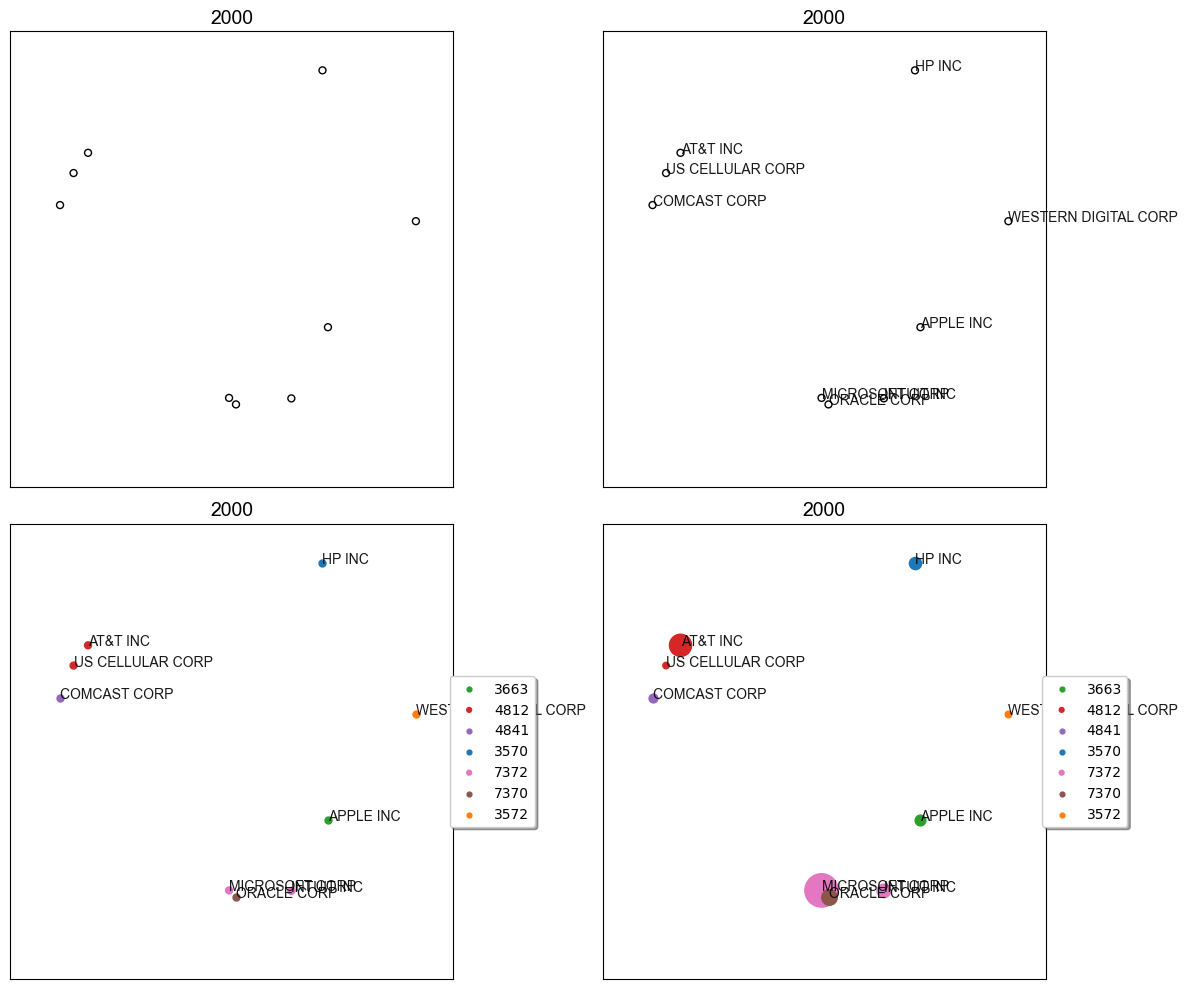

In [43]:
sic = data.sic1

fig, ax = plt.subplots(2,2,figsize = (12,10))
draw_map(X_t[0], ax = ax[0,0], title = periods[0])
draw_map(X_t[0], label = labels, ax = ax[0,1], title = periods[0])
draw_map(X_t[0], label = labels, ax = ax[1,0], show_legend = True, color = sic_codes,title = periods[0])
draw_map(X_t[0], label = labels, color = sic_codes, show_legend = True, size = sizes, ax = ax[1,1], title = periods[0])
fig.tight_layout()
fig.savefig(os.path.join(PATH_OUT, 'sect4_draw_map_examples.PNG'), dpi = 300)
fig

### Draw Map Sequence

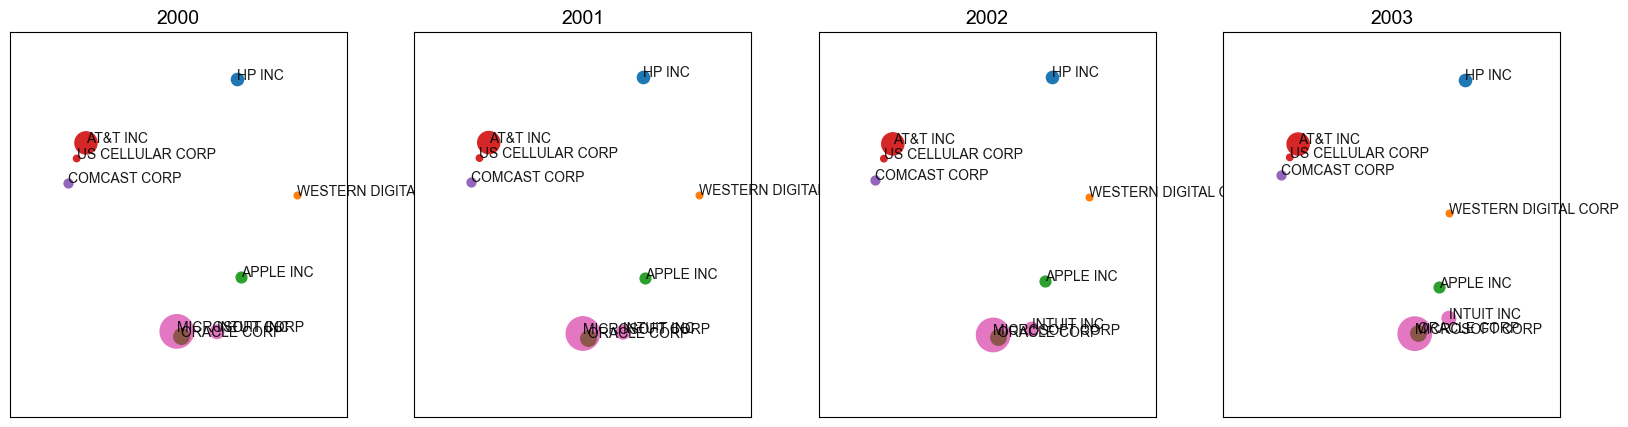

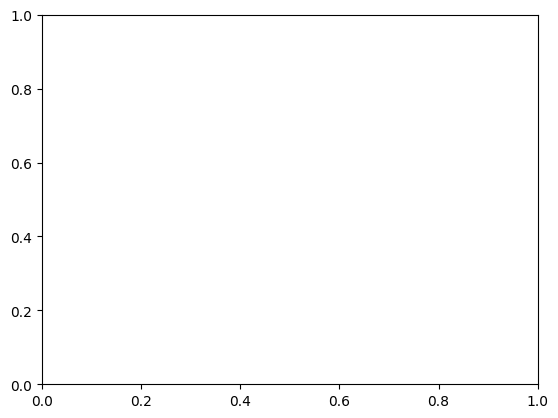

In [44]:
from evomap.printer import draw_map_sequence
fig = draw_map_sequence(X_t[:4], 
                  color = sic_codes,
                  label = labels, 
                  size = sizes,
                  fig_size = (20,5),
                  n_cols=4,
                  time_labels = periods[:4])

fig.savefig(os.path.join(PATH_OUT, 'sect4_draw_map_sequence.PNG'), dpi = 300)
fig

### Advanced: Adjust Figure Layout



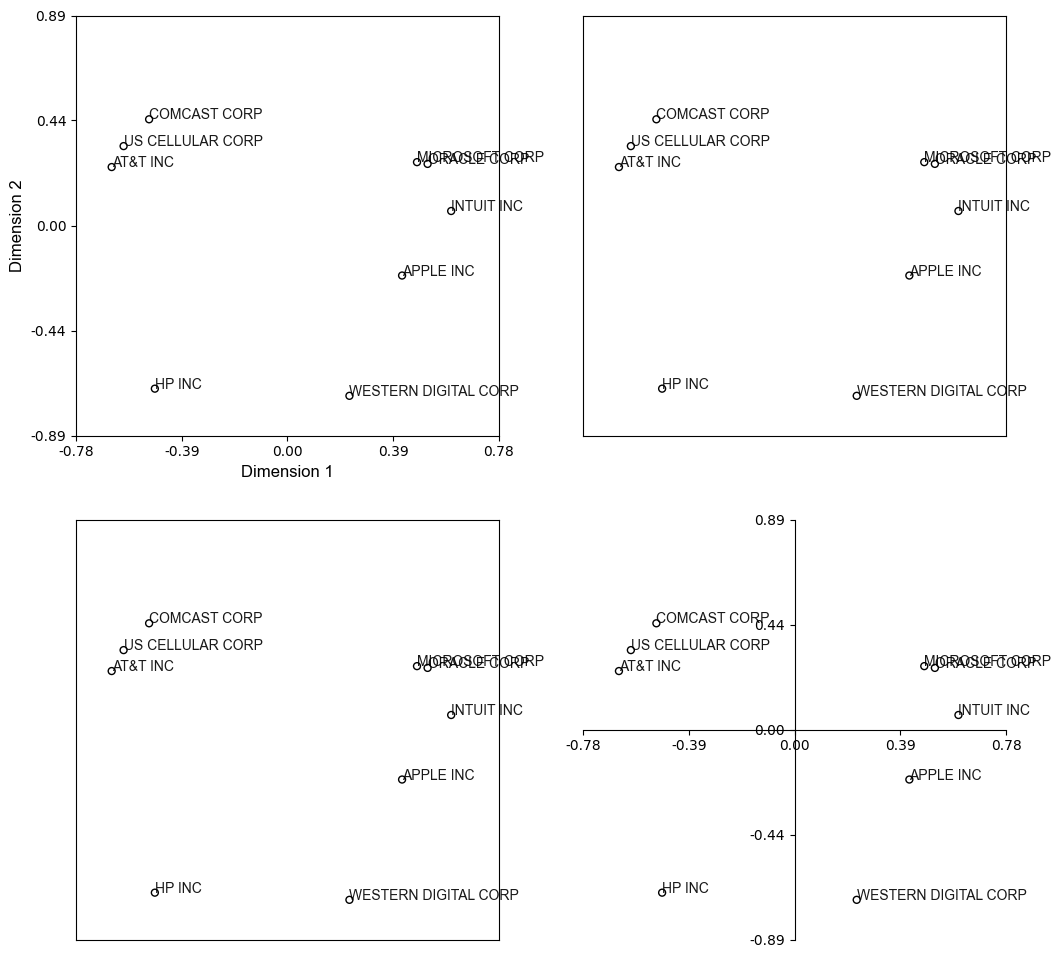

In [45]:
fig, ax = plt.subplots(2,2, figsize = (12,12))
draw_map(X, label = labels, show_axes = True, axes_at_origin = False, show_grid = False, ax = ax[0,0])
draw_map(X, label = labels, show_axes = False, axes_at_origin = False, show_grid = True, show_box= True, ax = ax[0,1])
draw_map(X, label = labels, show_axes = False, axes_at_origin = False, show_grid = False, show_box = False, ax = ax[1,0])
draw_map(X, label = labels, show_axes = True, axes_at_origin = True, show_grid = False, ax = ax[1,1])
fig

## Drawing Dynamic Maps

### Dynamic Map

In [46]:
sic_codes_t = []
sizes_t = []
for t in range(n_periods):
    # get data in period t
    data_this = data.query('year == @periods[@t]')
    # get all sic codes in period t
    sic_this = []
    for firm in labels:
        sic_this.append(data_this.query('name1 == @firm').sic1.unique()[0])

    sic_codes_t.append(np.array(sic_this))    


In [56]:
fig, ax = plt.subplots(1,2, figsize = (12,6))

from evomap.printer import draw_dynamic_map
draw_dynamic_map(X_t,
                 label = labels,
                 title = 'A: Dynamic Map',
                 color_t = sic_codes_t,
                 highlighted_labels = ['APPLE INC', 'INTUIT INC'],
                 show_arrows = True,
                 ax = ax[0])

### Draw Trajectories

In [57]:
draw_trajectories(X_t, 
                  labels = labels, 
                  period_labels = periods, 
                  ax = ax[1], 
                  title = "B: Trajectories")


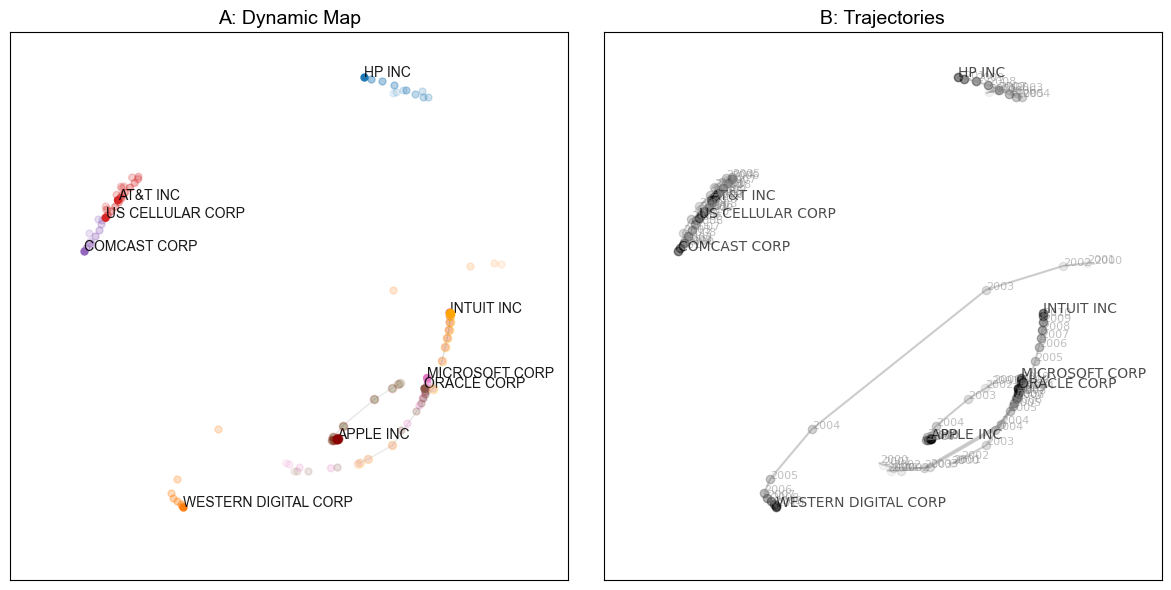

In [58]:
fig.tight_layout()
fig.savefig(os.path.join(PATH_OUT, 'sect4_dynamic_map_and_trajectories.PNG'), dpi = 300)
fig

## Evaluation

In [50]:
evomds_indep = EvoMDS(alpha = 0, verbose = 2, mds_type= 'ordinal').fit(D_t)

[EvoMDS] Running Gradient Descent with Backtracking via Halving
[EvoMDS] Iteration 50 -- Cost: 3.81 -- Gradient Norm: 0.0047
[EvoMDS] Iteration 100 -- Cost: 3.74 -- Gradient Norm: 0.0628
[EvoMDS] Iteration 146: gradient norm vanished. Final cost: 3.66


In [51]:
evomds_indep.cost_static_avg_

0.30513181567978814

In [52]:
evomds.cost_static_avg_

0.29883336414914946

In [54]:
from evomap.metrics import *

# Use the three lists X_t, X_t_indep, and X_t_indep_aligned and compute the following metrics for each of them: misalign_score, align_score, and avg_adjusted_hitrate_score. Store the results in a dataframe

misalign_score_t = []
align_score_t = []
persistence_score_t = []
avg_hitrate_score_t = []
avg_adjusted_hitrate_score_t = []

for i, X in enumerate([X_t, X_t_indep, X_t_indep_aligned]):
    misalign_score_t.append(misalign_score(X))
    align_score_t.append(align_score(X))
    persistence_score_t.append(persistence_score(X))
    avg_hitrate_score_t.append(avg_hitrate_score(X, D_t, input_format='dissimilarity', n_neighbors=5))
  
    avg_adjusted_hitrate_score_t.append(avg_adjusted_hitrate_score(X, D_t, input_format='dissimilarity', n_neighbors=5))

metrics = pd.DataFrame({'misalign_score': misalign_score_t, 
                        'align_score': align_score_t,
                        'hitrate_score': avg_hitrate_score_t,
                        'adjusted_hitrate_score': avg_adjusted_hitrate_score_t,},
                          index = ['EvoMDS', 'Independent MDS', 'Independent MDS + Alignment'])

metrics['average_stress'] = [evomds.cost_static_avg_, evomds_indep.cost_static_avg_, evomds_indep.cost_static_avg_]

# sort metrics such that the order is Independent MDS, Independent MDS + Alignment, EvoMDS
metrics = metrics.reindex(['Independent MDS', 'Independent MDS + Alignment', 'EvoMDS'])
metrics.round(4)

,misalign_score,align_score,hitrate_score,adjusted_hitrate_score,average_stress
Independent MDS,0.9659,0.0819,0.6759,0.0509,0.3051
Independent MDS + Alignment,0.4765,0.7295,0.6759,0.0509,0.3051
EvoMDS,0.0610,0.9786,0.6630,0.0380,0.2988


In [55]:
metrics.round(4).to_excel(os.path.join(PATH_OUT, 'sect4_metrics.xlsx'))

In [ ]:
draw_map(X_t[0], labels = data.name1.unique(), annotate = 'labels')

In [ ]:
draw_map(X_t[-1], labels = data.name1.unique(), annotate = 'labels')

In [ ]:
draw_trajectories(X_t, labels = data.name1.unique(), period_labels= periods)

In [ ]:
from evomap.printer import draw_dynamic_map
draw_dynamic_map(X_t, show_arrows=True, labels = data.name1.unique(), annotate = 'labels')

In [ ]:
def plot_evolving_party_positions(results, inclusions, timestamps = None, title_str = "", filename = ""):
    fig, ax = plt.subplots(figsize = (10,10))
    n_periods = len(results)
    for t, result in enumerate(results): 
        for i in range(len(result)):
            if inclusions[t][i] == 1:
                if n_periods > 1:
                    size = [25]
                else:
                    size = [100]
                ax.scatter(result[i, 0], result[i,1], c = palette[party_labels[i]], marker = markers[party_labels[i]], s = size)
                if t == len(results) -1 :
#                    if n_periods > 1:
#                        ax.text(result[i, 0], result[i,1], timestamps[t], size = 10, alpha = .5)
#                    else:
                    if n_periods < 48:
                        ax.text(result[i, 0], result[i,1], party_labels[i], size = 20, alpha = 1, c = palette[party_labels[i]])

                
                if t > 0:
                    if inclusions[t-1][i] == 1:
                        x1 = results[t-1][i,0]
                        x2 = results[t][i,0]
                        y1 = results[t-1][i,1]
                        y2 = results[t][i,1]

                        plt.plot([x1, x2], [y1,y2], c = palette[party_labels[i]])


    ax.set_xticklabels(ax.get_xticklabels(), fontdict = fontdict)
    ax.set_yticklabels(ax.get_yticklabels(), fontdict = fontdict)
    ax.set_title(title_str, fontdict = fontdict.update({'fontsize': 20}))


    ax.spines['left'].set_position('zero')
    ax.spines['left'].set_linewidth(.5)
    ax.spines['bottom'].set_position('zero')
    ax.spines['bottom'].set_linewidth(.5)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.grid(False)

    x_range = [-1.3, 1.3]
    y_range = [-1.3, 1.3]

    ax.set_xlim(x_range)
    ax.set_ylim(y_range)

    # Set the number of xticks and the tick positions
    num_ticks = 7
    x_tick_positions = np.linspace(x_range[0], x_range[1], num_ticks)
    y_tick_positions = np.linspace(y_range[0], y_range[1], num_ticks)

    # Set the xticks and labels
    ax.set_xticks(x_tick_positions)
    ax.set_xticklabels([f'{x:.1f}' for x in x_tick_positions])

    ax.set_yticks(y_tick_positions)
    ax.set_yticklabels([f'{x:.1f}' for x in y_tick_positions])
    ax.tick_params(axis='both', which='major', labelsize=8, labelcolor='grey')

    if not filename == "":
        fig.savefig(os.path.join(PATH_AUDIT, filename), dpi = 300)

plot_evolving_party_positions(
    results, 
    inclusions, 
    all_timestamps, 
    all_timestamps[0] + " - " + all_timestamps[-1],
    "monthly_positions_all.PNG")

In [ ]:
from evomap.metrics import align_score
align_score(X_t)

In [ ]:
draw_map(X_t[0], labels = labels)

In [ ]:
draw_map(X_t[-1], labels = labels)

In [ ]:
all_disparities

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))

Y = X_t.copy()
D = D_t.copy()

from sklearn.isotonic import IsotonicRegression
from scipy.spatial.distance import cdist
from scipy.stats import spearmanr

if type(Y) == list and type(D) == list:
    distances_flat = np.array([])
    disparities_flat = np.array([])
    n_periods = len(Y)
    for t in range(n_periods):
        distances = cdist(Y[t], Y[t], metric = 'euclidean')
        distances_flat_t = distances[np.tril_indices(len(distances),-1)]
        disparities_flat_t = D[t][np.tril_indices(len(D[t]),-1)]
        disparities_flat = np.concatenate([disparities_flat, disparities_flat_t])
        distances_flat = np.concatenate([distances_flat, distances_flat_t])        

else:
    distances = cdist(Y, Y, metric = 'euclidean')
    distances_flat = distances[np.tril_indices(len(distances),-1)]
    disparities_flat = D[np.tril_indices(len(D),-1)]        

ir = IsotonicRegression()

disp_hat = ir.fit_transform(distances_flat, disparities_flat)
df = pd.DataFrame({'disp': disparities_flat, 'dist': distances_flat, 'disp_hat' : disp_hat})
df = df.sort_values('dist')

from matplotlib.ticker import FuncFormatter

def format_tick_labels(x, pos):
    return '{0:.2f}'.format(x)

if ax is None:
    fig, ax = plt.subplots(figsize = (5,5))

ax.plot(df['disp'], df['dist'], "C0.", markersize = 12)
ax.plot(df['disp_hat'], df['dist'], "C1.-", markersize = 12)
ax.set_xlabel('Input Dissimilaritiy', fontdict= label_fontdict)
ax.set_ylabel('Map Distance', fontdict = label_fontdict)
x_min = 0
x_max = df['disp_hat'].max() * 1.1
y_min = 0
y_max = df['dist'].max() * 1.1
ax.set_ylim(y_min, y_max)
ax.set_xlim(x_min, x_max)
y_ticks = np.linspace(y_min, y_max, 7)
x_ticks = np.linspace(x_min, x_max, 7)

ax.set_yticks(y_ticks)
ax.set_xticks(x_ticks)
ax.tick_params(axis = 'both', labelsize = 8)
ax.xaxis.set_major_formatter(FuncFormatter(format_tick_labels))
ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))

ax.text(0.5, -0.1, 
        "Rank Correlation: {0:.2f}".format(spearmanr(df['dist'], df['disp_hat'])[0]), 
        ha = 'center', 
        transform = ax.transAxes, 
        fontdict = label_fontdict)

plt.grid(False)


In [ ]:
all_disparities

In [75]:
"""
Functions to draw maps.
"""

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import FuncFormatter

from cycler import cycler

DEFAULT_BUBBLE_SIZE = 25
DEFAULT_FONT_SIZE = 10

title_fontdict_large = {'size': 14, 'family': 'Arial'}
title_fontdict = {'size': 14, 'family': 'Arial'}
text_fontdict = {'size': 10, 'family': 'Arial'}
axis_label_fontdict = {'size': 12, 'family': 'Arial'}

def format_tick_labels(x, pos):
    return '{0:.2f}'.format(x)

def init_params(custom_params = None):
    """
    Set default aesthetic styles here.
    """
    return None

    mpl.rcParams.update(
        {"axes.prop_cycle": cycler('color', [
            "#1f77b4",
            "#ff7f0e",
            "#2ca02c",
            "#d62728",
            "#9467bd",
            "#8c564b",
            "#e377c2",
            "#7f7f7f",
            "#bcbd22",
            "#17becf"]),
        "axes.linewidth": 0,
        "axes.titlesize": 22,
        "axes.labelsize": 16,

        "axes.edgecolor": "black",
        "axes.linewidth": 1,

        "xtick.labelsize": 14,
        "ytick.labelsize": 14,
        "xtick.major.size": 0.1,
        "xtick.minor.size": 0.05,
        "ytick.major.size": 0.1,
        "ytick.minor.size": 0.05,

        "axes.grid": False,
        "grid.alpha": 0.3,
        "grid.linewidth": 0.5,
        "grid.linestyle": "--",
        "grid.color": "black",

        "savefig.facecolor": "w",
        "savefig.transparent": False,
        "savefig.bbox": "tight",
        "savefig.format": "png"
        }
        )

    if not custom_params is None:
        mpl.rcParams.update(custom_params)

def style_axes(ax, show_axes, show_box, show_grid, axes_at_origin):
    """Style the axes of a map."""

    ax.set_ylabel("Dimension 2", fontdict = axis_label_fontdict)
    ax.set_xlabel("Dimension 1", fontdict = axis_label_fontdict)
    
    if show_grid:
        ax.grid(True)
    else:
        ax.grid(False)

    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()

    # Make axes square
    max_range = np.max([xmax-xmin, ymax-ymin]) * 1.1
    x_mean = xmin + (xmax - xmin)/2
    y_mean = ymin + (ymax - ymin)/2
    
    n_ticks = 5
    n_decimals = 2

    xmin = x_mean - max_range/2
    xmax = x_mean + max_range/2
    ymin = y_mean - max_range/2
    ymax = y_mean + max_range/2

    if xmin < 0 and xmax > 0:
        # Make sure that 0 is one of the ticks
        max_xtick = np.max([np.abs(xmin), np.abs(xmax)])
        xmin = -max_xtick
        xmax = max_xtick

    if ymin < 0 and ymax > 0:
        # Make sure that 0 is one of the ticks
        max_ytick = np.max([np.abs(ymin), np.abs(ymax)])
        ymin = -max_ytick
        ymax = max_ytick

    y_ticks = np.linspace(ymin, ymax, n_ticks)
    x_ticks = np.linspace(xmin, xmax, n_ticks)

    ax.set_yticks(y_ticks)
    ax.set_xticks(x_ticks)
    ax.tick_params(axis = 'both', labelsize = 10)
    ax.xaxis.set_major_formatter(FuncFormatter(format_tick_labels))
    ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))

    if not show_axes:
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    if show_axes:
        ax.get_xaxis().set_visible(True)
        ax.get_yaxis().set_visible(True)

    if show_box == False:
        plt.box(on = False)
    else:
        plt.box(on = True)

    if axes_at_origin:
        # set the x-spine (see below for more info on `set_position`)
        ax.spines['left'].set_position('zero')

        # turn off the right spine/ticks
        ax.spines['right'].set_color('none')
        ax.yaxis.tick_left()

        # set the y-spine
        ax.spines['bottom'].set_position('zero')

        # turn off the top spine/ticks
        ax.spines['top'].set_color('none')
        ax.xaxis.tick_bottom()

        ax.set_xlabel('')
        ax.set_ylabel('')

def draw_map(X, label = None, color = None, size = None,  
             inclusions = None, zoom_on_cluster = None, highlighted_labels = None, 
             show_box = True, show_grid = False, show_axes = False, axes_at_origin = False, show_legend = False,
             cmap = None, filename = None, ax = None, fig_size = None, 
             title = None, rotate_labels = 0, scatter_kws = {}, fontdict = None, rcparams = None):

    # Validate input and make sure it is in the right format
    if not label is None:
        label = np.array(label)        

    if not highlighted_labels is None:
        # In case a single label is given, put it into a list
        if type(highlight_labels) == str:
            highlight_labels = [highlight_labels]
        if label is None:
            raise ValueError('Need to provide labels.')
        if not all(highlighted_label in label for highlighted_label in highlighted_labels):
            raise ValueError('All highlighted labels need to be contained in the labels array.')
    else:
        highlight_labels = []

    # By default, rotate labels for 1D data
    if X.shape[1] == 1 and rotate_labels == 0:
        rotate_labels = 45

    # If input is two dimension, add a constant second dimension for plotting
    n_samples = len(X)
    if len(X.shape) == 1:
        X = X.reshape((n_samples,1))
        X = np.concatenate([X, np.ones((n_samples,1))], axis = 1)

    if X.shape[1] == 1:
        X = np.concatenate([X, np.zeros_like(X)], axis = 1)

    if X.shape[1] > 2:
        print('Input array is more than two-dimensional. Only first two dimensions will be plotted')
    
    if color is None:
        color = np.zeros((n_samples, 1))
    else:
        color = np.array(color)

    color_label = np.unique(color)

    # Translate color values into indices
    cluster_label = color.copy().reshape((n_samples, 1))
    cluster = np.array([np.where(color_label == clust)[0][0] for clust in color]).reshape((n_samples, 1))

    # Prepare dataframe for plottings
    df_data = pd.DataFrame(
        data = np.hstack([X, cluster, cluster_label]), 
        columns = ['x','y','cluster', 'cluster_label'])

    df_data['cluster'] = df_data['cluster'].map(int)

    if not label is None:
        df_data['label'] = label

    # Check if inclusions are provided. If so, filter only included objects
    if not inclusions is None: 
        df_data = df_data[inclusions == 1]
    
    if not size is None:
        df_data['size'] = size
    else:
        df_data['size'] = DEFAULT_BUBBLE_SIZE

    # Zoom in on cluster - if necessary:
    if not zoom_on_cluster is None:
        df_data = df_data[df_data['cluster'] == zoom_on_cluster]

    # Explicitly calculate colors to avoid erroneous coloring
    if cmap is None:
        if len(np.unique(color)) <= 10:
            cmap = "tab10"
        elif len(np.unique(color)) <= 13:
            cmap = mpl.cm.get_cmap('tab10')
            hex = []
            for i in range(10):
                hex.append(mpl.colors.rgb2hex(cmap(i)))

            hex.append('#ffff33')
            hex.append('#b9ff66')
            hex.append('#cdb7f6')

            cmap = ListedColormap(hex) 
        elif len(np.unique(color)) <= 20:
            cmap = "tab20"
        else:
            cmap = "tab20"
            print("Warning: More than 20 clusters. Will include duplicate colors unless custom colormap is provided.")

    if type(cmap) == str:
        cmap = mpl.cm.get_cmap(cmap)
    
    df_data['color'] = df_data['cluster'].map(cmap)
    if len(df_data['color'].unique()) == 1:
        df_data["color"] = 'white'

    init_params(rcparams)

    # If not ax is provided, return the whole FIgure. Else, only draw the plot on the provided axes
    if ax is None:
        return_fig = True
        if fig_size is None:
            fig_size = (5,5)
        fig, ax = plt.subplots(figsize = fig_size)
    else:
        return_fig = False

    # Draw the map
    for cluster in df_data['cluster'].unique():
        df_data_this = df_data[df_data['cluster'] == cluster]

      #  scatter_kws.update({
      #      'facecolors': df_data_this['color'], 
      #      'edgecolors': 'black',
      #      's': df_data_this['size']})
        
        p = sns.regplot(
                x = df_data_this.x, 
                y = df_data_this.y,
                data = df_data_this, 
                fit_reg= False, 
                scatter_kws = scatter_kws,
                ax = ax)

    if fontdict is None:
        fontdict = text_fontdict.copy()

    # Add highlights
    if len(highlight_labels) > 0:
        fontdict.update({'size': fontdict['size']*0.8})
        highlighted_fontdict = fontdict.copy()
        highlighted_fontdict.update({'weight': 'bold', 'size': fontdict['size']*1.2})
    
    # Only print highlighted labels
    if len(highlight_labels) > 0:
        for i in range(len(df_data)):
            if label[i] in highlight_labels:
                p.text(
                    df_data['x'].iloc[i], 
                    df_data['y'].iloc[i], 
                    df_data['label'].iloc[i], 
                    alpha = 1,
                    rotatation = rotate_labels, 
                    fontdict = highlighted_fontdict)
            else:
                continue
    else:
        if not label is None:
            # Print all labels
            for i in range(len(df_data)):
                p.text(
                    df_data['x'].iloc[i], 
                    df_data['y'].iloc[i], 
                    df_data['label'].iloc[i], 
                    alpha = .9,
                    rotation = rotate_labels, 
                    fontdict = fontdict)

    style_axes(ax, show_axes, show_box, show_grid, axes_at_origin)

    if not color is None:
        if show_legend:
            ax.legend()

    if not title is None:
        ax.set_title(title, fontdict = title_fontdict)

    # Save or show plot 
    if not filename is None:
        mydpi = 300
        fig.savefig(filename, dpi = mydpi, format = 'png')

    plt.close()
    if return_fig:
        return fig

def draw_shepard_diagram(X, D, ax = None, show_grid = False, show_rank_correlation = True):
    """Draw a shepard diagram of input dissimilarities vs map distances.

    Parameters
    ----------
    X : np.ndarray of shape (n_samples, n_dims)
        configuration of objects on the map
    D : np.ndarray of shape (n_samples, n_samples)
        Dissimilarity matrix
    ax : Axes, optional
        Axes to draw the shepard diagram on, by default None
    show_grid : bool, optional
        If true, grid lines will be drawn, by default False
    show_rank_correlation : bool, optional
        If true, the Spearman rank correlation coefficient will be displayed below the plot, by default True
    """
    def normalize_dhat(d_hat, n_samples):
        return d_hat * np.sqrt((n_samples * (n_samples - 1) / 2) / (d_hat**2).sum())
    
    from sklearn.isotonic import IsotonicRegression
    from scipy.spatial.distance import cdist
    from scipy.stats import spearmanr

    D = D.copy()

    if type(X) == list and type(D) == list:
        all_distances = np.array([])
        all_disparities = np.array([])
        n_periods = len(X)
        for t in range(n_periods):
            distances = cdist(X[t], X[t], metric = 'euclidean')
            distances_flat = distances[np.tril_indices(len(distances),-1)]
            disparities_flat = D[t][np.tril_indices(len(D[t]),-1)]
            all_disparities = np.concatenate(all_disparities, disparities_flat)
            all_distances = np.concatenate(all_distances, distances_flat)        

    else:
        distances = cdist(X, X, metric = 'euclidean')
        distances_flat = distances[np.tril_indices(len(distances),-1)]
        disparities_flat = D[np.tril_indices(len(D),-1)]        

    ir = IsotonicRegression()

    disp_hat = ir.fit_transform(y = distances_flat, X = disparities_flat)
    disp_hat = normalize_dhat(disp_hat, X.shape[0])
    df = pd.DataFrame({'disp': disparities_flat, 'dist': distances_flat, 'disp_hat' : disp_hat})
    df = df.sort_values('disp')

    from matplotlib.ticker import FuncFormatter



    if ax is None:
        fig, ax = plt.subplots(figsize = (5,5))

    ax.plot(df['disp'], df['dist'], "C0.", markersize = 12)
    ax.plot(df['disp'], df['disp_hat'], "C1.-", markersize = 12)
    ax.set_xlabel('Input Dissimilaritiy', fontdict= axis_label_fontdict)
    ax.set_ylabel('Map Distance', fontdict = axis_label_fontdict)
    y_min = 0
    y_max = df['dist'].max()
    y_max *= 1.1
    x_min = df['disp'].min()
    x_max = df['disp'].max()
    x_min -= 0.1 * (x_max - x_min)
    x_max += 0.1 * (x_max - x_min)
    ax.set_ylim(y_min, y_max)
    ax.set_xlim(x_min, x_max)
    y_ticks = np.linspace(y_min, y_max, 7)
    x_ticks = np.linspace(x_min, x_max, 7)

    ax.set_yticks(y_ticks)
    ax.set_xticks(x_ticks)
    ax.tick_params(axis = 'both', labelsize = 8)
    ax.xaxis.set_major_formatter(FuncFormatter(format_tick_labels))
    ax.yaxis.set_major_formatter(FuncFormatter(format_tick_labels))

    if show_rank_correlation:
        ax.text(0.5, -0.15, 
            "Rank Correlation: {0:.2f}".format(spearmanr(df['disp'], df['dist'])[0]), 
            ha = 'center', 
            transform = ax.transAxes, 
            fontdict = axis_label_fontdict)
    
    if show_grid:
        ax.grid(True)
    else:
        ax.grid(False)

def draw_map_sequence(X_t, color_t = None, incl_t = None, n_cols = 4, time_labels = [], show_axes = False, **kwargs):
    """ Draw a sequence of static maps next to each other. Can use the same
    arguments as the 'draw_map' function as dictionary.

    Parameters
    ----------
    Y_ts : list of ndarrays, each of shape (n_samples, d)
        Sequence of map coordinates.
    c_ts : list of ndarray, each of shape (n_samples,), optional
        Sequence of cluster assignments used for coloring (int), by default None
        If the cluster assignments are constant, one can simply provide a single 
        array as kwarg.
    n_cols : int, optional
        Max. number of maps shown in one row, by default 4
    map_kws : dict, optional
        Additional arguments for the 'draw_map' function, by default None
    time_labels: list of str, optional
        When given, use these labels as title strings
    """
    n_periods = len(X_t)
    n_rows = int(np.ceil(n_periods/n_cols))
    
    fig, axs = plt.subplots(n_rows, n_cols, figsize = (4*n_cols, 4*n_rows))
        

    if len(time_labels) == 0:
        time_labels = ["Period " + str(t+1) for t in range(n_periods)]

    draw_map_kws = {}
    draw_map_args = draw_map.__code__.co_varnames[:draw_map.__code__.co_argcount]
    for key, value in kwargs.items():
        if key in draw_map_args:
            draw_map_kws.update({key: value})

    row = 0
    col = 0
    ymin, ymax , xmin, xmax = np.inf,-np.inf,np.inf,-np.inf

    for t in range(n_periods):
        if n_rows > 1:
            draw_map_kws.update({
                'X': X_t[t],
                'ax': axs[row, col]
            })
        else:
            draw_map_kws.update({
                'X': X_t[t],
                'ax': axs[col]
            })
        if not color_t is None:
            draw_map_kws.update({'c': color_t[t]})
        if not time_labels is None:
            draw_map_kws.update({'title': time_labels[t]})

        if not incl_t is None:
            draw_map_kws.update({'inclusions': incl_t[t]})

        draw_map(**draw_map_kws)            
        if not incl_t is None:            
            ymin_i, ymax_i = np.min(X_t[t][incl_t[t] == 1, 1]), np.max(X_t[t][incl_t[t] == 1, 1])
            xmin_i, xmax_i = np.min(X_t[t][incl_t[t] == 1, 0]), np.max(X_t[t][incl_t[t] == 1, 0])
        else:
            ymin_i, ymax_i = np.min(X_t[t][:, 1]), np.max(X_t[t][:, 1])
            xmin_i, xmax_i = np.min(X_t[t][:, 0]), np.max(X_t[t][:, 0])
            
        if ymin_i < ymin:
            ymin = ymin_i
        if xmin_i < xmin:
            xmin = xmin_i
        if ymax_i > ymax:
            ymax = ymax_i
        if xmax_i > xmax:
            xmax = xmax_i
        
        if col < n_cols - 1:
            col += 1
        else: 
            row += 1
            col = 0

    # Make axes square
    max_range = np.max([xmax-xmin, ymax-ymin]) * 1.1
    x_mean = xmin + (xmax - xmin)/2
    y_mean = ymin + (ymax - ymin)/2

    xmin = x_mean - max_range/2
    xmax = x_mean + max_range/2
    ymin = y_mean - max_range/2
    ymax = y_mean + max_range/2

    row = 0
    col = 0
    for t in range(n_periods):
        if n_rows > 1:       
            axs[row,col].set_xlim(xmin, xmax)
            axs[row,col].set_ylim(ymin,ymax)
            axs[row, col].set_xticks(np.linspace(xmin, xmax, 7))
            axs[row, col].set_yticks(np.linspace(ymin, ymax, 7))
            if show_axes:
                axs[row, col].xaxis.set_ticklabels(np.round(np.linspace(xmin, xmax, 7), 3), fontsize = 6)
                axs[row, col].yaxis.set_ticklabels(np.round(np.linspace(ymin, ymax, 7),3), fontsize = 6)
            else:
                axs[row, col].xaxis.set_ticklabels([])
                axs[row, col].yaxis.set_ticklabels([])

        else:
            axs[col].set_xlim(xmin, xmax)
            axs[col].set_ylim(ymin,ymax)
            axs[col].set_xticks(np.linspace(xmin, xmax, 7))
            axs[col].set_yticks(np.linspace(ymin, ymax, 7))
            if show_axes:
                axs[col].xaxis.set_ticklabels(np.round(np.linspace(xmin, xmax, 7), 3), fontsize = 6)
                axs[col].yaxis.set_ticklabels(np.round(np.linspace(ymin, ymax, 7),3), fontsize = 6)
            else:
                axs[col].xaxis.set_ticklabels([])
                axs[col].yaxis.set_ticklabels([])

        if col < n_cols - 1:
            col += 1
        else: 
            row += 1
            col = 0

    return fig

def fit_attribute(coords, attribute_label, attribute_values, map):
    """ Fit an attribute to the map and display the resultant vector.

    To do so, regress the attribute value on map coordinates and use
    the coefficients as arrow coordinates.

    Parameters
    ----------
    coords : ndarray of shape (n_samples, n_dims)
        Map coordinates.
    attribute_label : string
        Attribute label (displayed next to vector).
    attribute_values : ndarray of shape (n_samples,)
        Attribute values for each sample.
    map : matplotlib.figure
        Figure containing the map (i.e., output of draw_map function)

    Returns
    -------
    matplotlib.figure
        Figure containing the map with property vector added.
    """
    import statsmodels.api as sm
    SCALE = 10
    ax = map.axes[0]
    X = coords
    y = attribute_values
    est=sm.OLS(y, X)
    result = est.fit().params
    result['x1']
    result['x2']
    ax.arrow(0,0,result['x1']*SCALE,result['x2']*SCALE, linestyle = '--', lw = .25, alpha = .75, width = .001, color = 'grey',  head_width = 0.1)
    ax.text(result['x1']*1.1*SCALE, result['x2']*1.1*SCALE, attribute_label, fontdict= {'size': 8, 'color': 'darkblue', 'weight': 'normal'})
    return map

def fit_attributes(map_coords, df_attributes, map):
    """ Fit multiple attributes and display their vectors in the map.

    Parameters
    ----------
    map_coords : ndarray of shape (n_samples, n_dims)
        Map coordinates.
    df_attributes : pd.DataFrame
        Dataframe containing the attributes. Each column is expected to 
        correspond to one attribute. Make sure to label colums and 
        that the number of rows equals n_samples.
    map : matplotlib.figure
        Figure containing the map (i.e., output of draw_map function)

    Returns
    -------
    matplotlib.figure
        Figure containing the map with property vectors added.
    """

    for attribute in df_attributes.columns:
        map = fit_attribute(
            coords = map_coords, 
            attribute_label = attribute,
            attribute_values = df_attributes[attribute], 
            map = map)
    return map

def draw_dynamic_map(Y_ts, c_ts = None, incl_ts = None, show_arrows = False, 
    show_last_positions_only = False, highlight_trajectories = None, 
    time_labels = None, transparency_start = 0.1, transparency_end = 0.4, 
    transparency_final = 1.,**kwargs):
    """ Draw a dynamic map, jointly visualizing all object's map coordinates
    over time. Can take all arguments of 'draw_map' as kwargs. 

    Parameters
    ----------
    Y_ts : list of ndarrays, each of shape (n_samples, d)
        Sequence of map coordinates.
    c_ts : list of ndarray, each of shape (n_samples,), optional
        Sequence of cluster assignments used for coloring (int), by default None
        If the cluster assignments are constant, one can simply provide a single 
        array as kwarg.
    incl_ts : list of ndarrays, each of shape (n_samples, ), optional
        Sequence of inclusion arrays, each indicating if an object is present
        in period t (via 0 and 1s), by default None
    show_arrows : bool, optional
        If true, objects' subsequent positions are connected by arrows, by default False
    show_last_positions_only : bool, optional
        If true, only the map positions for the last period are displayed. Should
        be combined with 'show arrows = True', by default False
    highlight_trajectories : list, optional
        Labels for which trajectories should be highlighted, by default None
    transparency_start : float, optional
        Transparency of bubbles for first period, by default 0.1
    transparency_end : float, optional
        Transparency of bubbles for second-last period, by default 0.4
    transparency_final : float, optional
        transparency of bubbles for last period, by default 1.

    """

    # Check inputs
    n_periods = len(Y_ts)
    n_samples = Y_ts[0].shape[0]
    if np.any([Y_t.shape != Y_ts[0].shape for Y_t in Y_ts]):
        raise ValueError('All input arrays need to be of similar shape.')

    if not c_ts is None:
        if np.any([c_t.shape[0] != n_samples for c_t in c_ts]):
            raise ValueError('Misshaped class arrays.')

    if not incl_ts is None:
        if np.any([incl_t.shape[0] != n_samples for incl_t in incl_ts]):
            raise ValueError('Misshaped inclusion arrays.')

    else:
        incl_ts = [np.repeat(1,n_samples)]*n_periods

    # Data preparation
    transparencies = np.linspace(transparency_start, transparency_end, n_periods-1).tolist()
    transparencies.append(transparency_final)
  
    highlight_colors = ['darkred', 'orange', 'darkgreen', 'slategrey']

    if not 'labels' in kwargs.keys():
        labels = np.array([str(i+1) for i in range(n_samples)])
    else:
        labels = np.array(kwargs['labels'])

    if not time_labels is None:
        labels = [label + " " + time_labels[i] for i, label in enumerate(time_labels)]

    # Highlight labels are only shown in last period - so safe them now for later
    labels_to_highlight = []
    if not highlight_trajectories is None:
        labels_to_highlight = np.concatenate((labels_to_highlight, highlight_trajectories))

    if 'highlight_labels' in kwargs.keys():
        labels_to_highlight = np.concatenate((labels_to_highlight, kwargs['highlight_labels']))

    if len(labels_to_highlight) >0:
        labels_to_highlight = np.unique(labels_to_highlight)
    
    if 'annotate' in kwargs.keys():
        annotate = kwargs['annotate']
    else: 
        annotate = None

    # Draw map
    draw_map_kws = {}
    draw_map_args = draw_map.__code__.co_varnames[:draw_map.__code__.co_argcount]
    for key, value in kwargs.items():
        if key in draw_map_args:
            draw_map_kws.update({key: value})    

    # Prepare figure
    if not 'ax' in kwargs.keys():
        if 'fig_size' in kwargs.keys():
            fig_size = kwargs['fig_size']
        else:
            fig_size = (5,5)
            
        fig, ax = plt.subplots(figsize = fig_size)
        draw_map_kws.update({'ax': ax})    
    
    # Plot each period
    for t in range(n_periods):

        draw_map_kws.update({
            'Y': Y_ts[t], 
            'inclusions': incl_ts[t], 
            'filename': None, 
            'title': None,
            'scatter_kws': {'alpha': transparencies[t]}})

        # Only show labels for the last period
        if t < n_periods - 1:
            draw_map_kws.update({
                'annotate': None, 
                'highlight_labels': None})
        else:
            draw_map_kws.update({
                'annotate': annotate, 
                'highlight_labels': labels_to_highlight})

            if 'title' in kwargs.keys():
                draw_map_kws.update({'title': kwargs['title']})
            
        if not c_ts is None:
            draw_map_kws.update({'c' : c_ts[t]})

        if t < n_periods-1:
            draw_map_kws.update({'labels': None})

        if not (t < n_periods -1  and show_last_positions_only):
            p = draw_map(**draw_map_kws)

            if not highlight_trajectories is None:
                highlight_count = 0
                highlight_indices = [np.where(labels == label)[0][0] for label in highlight_trajectories]
                for i in highlight_indices:
                    x = Y_ts[t][:,0][i]
                    y = Y_ts[t][:,1][i]
                    sns.regplot(
                        x = [x], 
                        y = [y],
                        fit_reg=False, 
                        scatter_kws={
                            'zorder': 10,
                            'alpha': transparencies[t], 
                            'facecolors': highlight_colors[highlight_count], 
                            'edgecolor': highlight_colors[highlight_count]})
                    highlight_count += 1


        if (t > 0) and show_arrows:

            arrow_starts_x = Y_ts[t-1][:,0]
            arrow_starts_y = Y_ts[t-1][:,1]
            deltas_x = Y_ts[t][:,0] - Y_ts[t-1][:,0]
            deltas_y = Y_ts[t][:,1] - Y_ts[t-1][:,1]

            highlight_count = 0
            if not highlight_trajectories is None:
                arrow_indices = [np.where(labels == label)[0][0] for label in highlight_trajectories]
            else:
                arrow_indices = np.array([i for i in range(n_samples)])

            for i in arrow_indices:
                # In case of zooming, only print arrows for objects within this cluster
                if 'zoom_on_cluster' in kwargs.keys():
                    if not kwargs['zoom_on_cluster'] is None:
                        if str(draw_map_kws['c'][i]) != str(kwargs['zoom_on_cluster']):
                            continue

                if (incl_ts[t][i] == 1) and (incl_ts[t-1][i] == 1):
                    if not (deltas_x[i] * deltas_y[i]) == 0:
                        if not highlight_trajectories is None:
                            col = highlight_colors[highlight_count]
                            arrow_size = .005
                            alpha = transparencies[t-1]
                            highlight_count +=1
                        else:
                            col = 'grey'
                            alpha = transparencies[t-1]
                            arrow_size = .005
                        ax.plot(
                            [Y_ts[t-1][i,0], Y_ts[t][i,0]],
                            [Y_ts[t-1][i,1], Y_ts[t][i,1]],
                            color = 'grey', alpha = alpha,
                            linewidth = 1)
                        """
                        ax.arrow(
                            arrow_starts_x[i],
                            arrow_starts_y[i],
                            deltas_x[i],
                            deltas_y[i],
                            width = 0.01,
                            head_width = 0,
                            head_length = 0,
                            fc = col,
                            ec = col,
                            length_includes_head = True,
                            alpha = alpha)
                        """

    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()

    ax.set_xticks(np.linspace(xmin, xmax, 7))
    ax.set_yticks(np.linspace(ymin, ymax, 7))

    if 'filename' in kwargs.keys():
        fig.savefig(kwargs['filename'], dpi = 300, format = "png")

    plt.close()
    return fig

def draw_trajectories(Y_ts, labels, selected_labels = None, title = None, 
    show_axes = False, show_box = True, show_grid = False, axes_at_origin = False,
    annotate_periods = True, period_labels = None, ax = None, figsize = None):
    """ Draw the trajectories of selected objects.

    Parameters
    ----------
    Y_ts : list of ndarrays, each of shape (n_samples, d)
        Sequence of map coordinates.
    labels : ndarray of shape (n_samples,)
        Object labels (str)
    selected_labels : ndarray of shape (n_selected,), optional
        Selected object labels (str), by default None
    title : str, optional
        Figure title, by default None
    annotate_periods : bool, optional
        If true, labels for each period are shown next to each pair of map 
        coordinates, by default True
    period_labels : ndarray of shape (n_periods,), optional
        Period labels (str), by default None
    ax : matplotlib.axes.Axes, optional
        Pre-existing axes for the plot, by default None
    figsize : tuple, optional
        Figure size, by default (12,12)
    """

    n_periods = len(Y_ts)
    n_firms = Y_ts[0].shape[0]
    if selected_labels == None:
        selected_labels = labels

    # If not ax is provided, return the whole FIgure. Else, only draw the plot on the provided axes
    if ax is None:
        return_fig = True
        if fig_size is None:
            fig_size = (5,5)
        fig, ax = plt.subplots(figsize = fig_size)
    else:
        return_fig = False  

    annotations = []

    if period_labels is None and annotate_periods == True:
        period_labels = ["Period " + str(t+1) for t in range(n_periods)]

    for i in range(n_firms):
        if not labels[i] in selected_labels:
            continue
        xs = []
        ys = []
        # Plot the points
        for t in range(n_periods):
            alpha = 1 - (n_periods - t) / n_periods
            alpha = alpha * .5
            x = Y_ts[t][i,0]
            y = Y_ts[t][i,1]
            c = 'black'
            c_line = 'grey'
            label = labels[i]
            ax.scatter(x,y , c = c, alpha = alpha)
            xs.append(x)
            ys.append(y)
            if t == n_periods - 1:
                label = ax.text(x ,y , label, c = c, alpha = .7, fontsize = DEFAULT_FONT_SIZE)
                annotations.append(label)

            elif annotate_periods:
                label = ax.text(x ,y , period_labels[t], c = c_line, alpha = .5, fontsize = DEFAULT_FONT_SIZE * 0.8)
#               texts.append(label)

        # Plot the trajectory
        ax.xaxis.set_ticklabels([])
        ax.yaxis.set_ticklabels([])
        ax.plot(xs, ys, c = c_line, alpha = .4)

    style_axes(ax = ax, show_axes= show_axes, show_box = show_box, show_grid = show_grid, axes_at_origin = axes_at_origin)

    if not title is None:
        ax.set_title(title, fontsize = DEFAULT_FONT_SIZE)
#    adjust_text(texts, force_points = 0.15,  arrowprops=dict(arrowstyle="->", color='grey', lw=0.5))
    plt.close()
    if return_fig:
        return fig
